# Risk Assessment and Strategic Aircraft Selection for a Safe and Profitable Aviation Venture

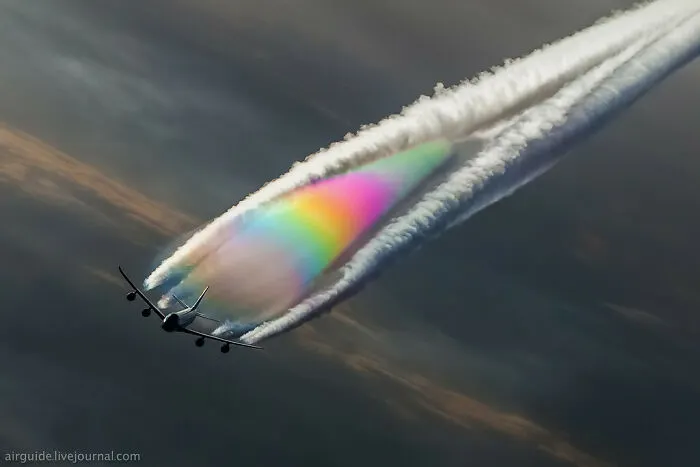

## Introduction

As our comapany,DawnsEstate,expands into new industries to diversify its portfolio, we are exploring the aviation sector, specifically the purchase and operation of aircraft for both commercial and private enterprises. However, entering this industry requires a thorough understanding of the risks associated with different aircraft models. Factors such as safety records, operational reliability, maintenance costs, and historical accident data must be carefully analyzed to minimize financial and operational risks.

### Project Objectives

Our objectives include:

1.Identify the lowest-risk aircraft models that align with our business goals.

2.Conducting a data-driven analysis of aircraft safety, reliability, and operational efficiency.

3.Provide actionable insights that will guide investment decisions.

### Why This Analysis Matters

Investing in aviation is a high-stakes decision that can impact our company's reputation, financial stability, and long-term success. Poor aircraft selection can lead to increased maintenance costs, higher insurance premiums, operational disruptions, and, in extreme cases, safety incidents. By leveraging data analytics and industry research, we can make informed choices that reduce risk and maximize profitability.

Through this project, we will provide the head of the new aviation division with a comprehensive evaluation of aircraft models, allowing for strategic decision-making in acquiring and operating aircraft safely and efficiently.

### Chapter One: Data Preparation and Data Cleaning

#### Data Preparation

We will be using pandas for our data preparation and cleaning as well as numpy for mathematical computations. Let's proceed and import the relevant libraries.

In [135]:
import pandas as pd
import numpy as np

In [194]:
## Using(engine='python') may be essential to solve a possible parse error.
aviation_data=pd.read_csv("AviationData.csv",engine="python")

In [137]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [195]:
aviation_data.isnull().sum()
#Let's check out the null values as we examine the dataset keys.

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [139]:
type(aviation_data)

pandas.core.frame.DataFrame

In [196]:
## We will also load the US State Codes for later use.
state_codes=pd.read_csv("USState_Codes.csv")

In [197]:
state_codes

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


#### Data Cleaning 

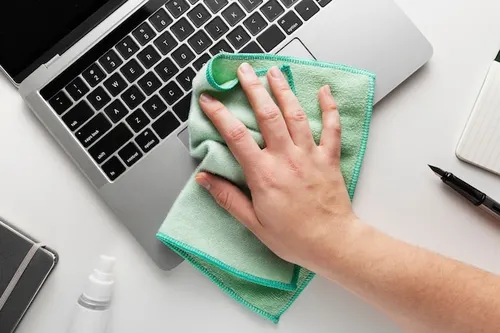

Here we will be looking for irrelevant data, replacing duplicates and with mathematical analysis judege how to approach missing values that may affect our research. We can also drop unneccesary columns and pick those that are important to us for later visualization. 

In [198]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Also check for duplicates

In [209]:
duplicates = aviation_data.duplicated()
duplicates.value_counts()

False    88630
dtype: int64

We have no duplicates.We have 52 missing entries on our["Location"] column. We can drop them as they do not greatly affect our research.

In [199]:
aviation_data=aviation_data.dropna(subset=["Location"])

The columns "Latitude" and "Longitude" and "Schedule" are mostly null so we can drop them. The publication date is unnecessary data as we can use the "Event.date" to know hwne the accidents occurred.

In [200]:
aviation_data=aviation_data.drop(columns=["Latitude","Longitude","Schedule","Publication.Date"])

Most items on our dataset happened in United States. We can fill the 226 empty data with "United States"

In [201]:
aviation_data["Country"]=aviation_data["Country"].fillna("United States")

Since we will need data on the "Make", "Model" and "Amateur.Built" and we can't guess the data let's drop the missing rows.

In [202]:
aviation_data=aviation_data.dropna(subset=["Make","Model","Amateur.Built"])

In [153]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,FAR.Description,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,091,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,091,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,091,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [154]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38428
Airport.Name              35896
Injury.Severity             979
Aircraft.damage            3149
Aircraft.Category         56412
Registration.Number        1189
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5919
Engine.Type                6926
FAR.Description           56721
Purpose.of.flight          6066
Air.carrier               72025
Total.Fatal.Injuries      11309
Total.Serious.Injuries    12387
Total.Minor.Injuries      11806
Total.Uninjured            5821
Weather.Condition          4379
Broad.phase.of.flight     26979
Report.Status              6335
dtype: int64

Let's look at how the column "Weather.Condition" relates with other essential columns for this project.

In [155]:
aviation_data["Weather.Condition"].value_counts() 

VMC    77200
IMC     5960
UNK      829
Unk      262
Name: Weather.Condition, dtype: int64

In [156]:
aviation_data[["Number.of.Engines","Make","Model","Total.Fatal.Injuries",
               "Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured","Weather.Condition"]]

,Number.of.Engines,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,1.0,Stinson,108-3,2.0,0.0,0.0,0.0,UNK
1,1.0,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK
2,1.0,Cessna,172M,3.0,NaN,NaN,NaN,IMC
3,1.0,Rockwell,112,2.0,0.0,0.0,0.0,IMC
4,NaN,Cessna,501,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...
88884,NaN,PIPER,PA-28-151,0.0,1.0,0.0,0.0,NaN
88885,NaN,BELLANCA,7ECA,0.0,0.0,0.0,0.0,NaN
88886,1.0,AMERICAN CHAMPION AIRCRAFT,8GCBC,0.0,0.0,0.0,1.0,VMC
88887,NaN,CESSNA,210N,0.0,0.0,0.0,0.0,NaN


In [214]:
### Replacing for unk weather conditions to make tha dataset cleaner.We can also fill the null data with UNK. We will be using .replace() and .fillna()

aviation_data=aviation_data.copy()
aviation_data["Weather.Condition"] = aviation_data["Weather.Condition"].replace({"Unk": "UNK"})
aviation_data["Weather.Condition"]=aviation_data["Weather.Condition"].fillna("UNK")
aviation_data["Weather.Condition"].value_counts()

VMC    77200
IMC     5960
UNK     5470
Name: Weather.Condition, dtype: int64

Thad one let us look at the "Make" column data and check fo patterns that need cleaning.

In [215]:
aviation_data["Make"].value_counts().head(50)

Cessna                            22200
Piper                             12015
CESSNA                             4919
Beech                              4321
PIPER                              2840
Bell                               2128
Boeing                             1552
BOEING                             1145
Grumman                            1094
Mooney                             1090
BEECH                              1041
Robinson                            944
Bellanca                            885
Hughes                              795
Schweizer                           627
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   519
Aeronca                             486
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342


There were instances of inconsistent namong of related values. Lets make them as uniform as possible for analysis.

In [217]:
aviation_data["Make"]=aviation_data["Make"].replace({"CESSNA":"Cessna","BOEING":"Boeing","PIPER":"Piper","BEECH":"Beech","Airbus Industrie":"AIRBUS",})
aviation_data["Make"] = aviation_data["Make"].apply(lambda x: x.lower().capitalize() if isinstance(x, str) else x)
aviation_data["Make"].value_counts()

Cessna                  27119
Piper                   14855
Beech                    5362
Bell                     2716
Boeing                   2697
                        ...  
Furru donald jeffrey        1
Kashpureff                  1
Fallbeck                    1
William k. crawford         1
Hulle                       1
Name: Make, Length: 7573, dtype: int64

Now our "Make" column makes sense.

In [165]:
aviation_data["Report.Status"]

0        Probable Cause
1        Probable Cause
2        Probable Cause
3        Probable Cause
4        Probable Cause
              ...      
88884               NaN
88885               NaN
88886               NaN
88887               NaN
88888               NaN
Name: Report.Status, Length: 88630, dtype: object

In [166]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38428
Airport.Name              35896
Injury.Severity             979
Aircraft.damage            3149
Aircraft.Category         56412
Registration.Number        1189
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5919
Engine.Type                6926
FAR.Description           56721
Purpose.of.flight          6066
Air.carrier               72025
Total.Fatal.Injuries      11309
Total.Serious.Injuries    12387
Total.Minor.Injuries      11806
Total.Uninjured            5821
Weather.Condition             0
Broad.phase.of.flight     26979
Report.Status              6335
dtype: int64

In [167]:
aviation_data["Aircraft.Category"].value_counts()

Airplane             27557
Helicopter            3431
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [168]:
aviation_data["Aircraft.Category"]= aviation_data["Aircraft.Category"].fillna(aviation_data["Aircraft.Category"].mode()[0])

In [169]:
aviation_data["Aircraft.Category"].value_counts()

Airplane             83969
Helicopter            3431
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [170]:
aviation_data["Total.Fatal.Injuries"]= aviation_data["Total.Fatal.Injuries"].fillna(0.0)

In [171]:
aviation_data["Total.Serious.Injuries"]= aviation_data["Total.Serious.Injuries"].fillna(0.0)

In [172]:
aviation_data["Total.Minor.Injuries"]= aviation_data["Total.Minor.Injuries"].fillna(0.0)

In [173]:
aviation_data["Total.Uninjured"]= aviation_data["Total.Uninjured"].fillna(0.0)

In [174]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38428
Airport.Name              35896
Injury.Severity             979
Aircraft.damage            3149
Aircraft.Category             0
Registration.Number        1189
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5919
Engine.Type                6926
FAR.Description           56721
Purpose.of.flight          6066
Air.carrier               72025
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     26979
Report.Status              6335
dtype: int64

In [175]:
aviation_data["Purpose.of.flight"]

0        Personal
1        Personal
2        Personal
3        Personal
4        Personal
           ...   
88884    Personal
88885         NaN
88886    Personal
88887    Personal
88888    Personal
Name: Purpose.of.flight, Length: 88630, dtype: object

In [176]:
aviation_data["Purpose.of.flight"]= aviation_data["Purpose.of.flight"].fillna(aviation_data["Purpose.of.flight"].mode()[0])

In [177]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38428
Airport.Name              35896
Injury.Severity             979
Aircraft.damage            3149
Aircraft.Category             0
Registration.Number        1189
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5919
Engine.Type                6926
FAR.Description           56721
Purpose.of.flight             0
Air.carrier               72025
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     26979
Report.Status              6335
dtype: int64

In [178]:
aviation_data["Airport.Code"]= aviation_data["Airport.Code"].fillna("Not Specified")
aviation_data["Airport.Name"]= aviation_data["Airport.Name"].fillna("Not Specified")
aviation_data["Air.carrier"]= aviation_data["Air.carrier"].fillna("Not Specified")
aviation_data["Broad.phase.of.flight"]= aviation_data["Broad.phase.of.flight"].fillna("Not Specified")
aviation_data["Report.Status"]= aviation_data["Report.Status"].fillna("Not Specified")

In [179]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity             979
Aircraft.damage            3149
Aircraft.Category             0
Registration.Number        1189
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5919
Engine.Type                6926
FAR.Description           56721
Purpose.of.flight             0
Air.carrier                   0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

In [180]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,FAR.Description,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Not Specified,Not Specified,Fatal(2),Destroyed,...,NaN,Personal,Not Specified,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Not Specified,Not Specified,Fatal(4),Destroyed,...,NaN,Personal,Not Specified,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Not Specified,Not Specified,Fatal(3),Destroyed,...,NaN,Personal,Not Specified,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Not Specified,Not Specified,Fatal(2),Destroyed,...,NaN,Personal,Not Specified,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Not Specified,Not Specified,Fatal(1),Destroyed,...,NaN,Personal,Not Specified,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Not Specified,Not Specified,Minor,NaN,...,091,Personal,Not Specified,0.0,1.0,0.0,0.0,UNK,Not Specified,Not Specified
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Not Specified,Not Specified,NaN,NaN,...,NaN,Personal,Not Specified,0.0,0.0,0.0,0.0,UNK,Not Specified,Not Specified
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,091,Personal,Not Specified,0.0,0.0,0.0,1.0,VMC,Not Specified,Not Specified
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Not Specified,Not Specified,NaN,NaN,...,091,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,UNK,Not Specified,Not Specified


In [181]:
aviation_data["FAR.Description"].value_counts()

091                               18220
Part 91: General Aviation          6457
NUSN                               1573
137                                1010
NUSC                                987
135                                 746
121                                 674
Part 137: Agricultural              435
UNK                                 362
Part 135: Air Taxi & Commuter       297
PUBU                                253
129                                 244
Part 121: Air Carrier               162
133                                 107
Non-U.S., Non-Commercial             93
Part 129: Foreign                    90
Non-U.S., Commercial                 86
Part 133: Rotorcraft Ext. Load       32
Unknown                              21
Public Use                           18
091K                                 14
ARMF                                  7
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


In [182]:
aviation_data["FAR.Description"]=aviation_data["FAR.Description"].fillna("Unknown")
aviation_data["FAR.Description"]=aviation_data["FAR.Description"].replace({"Unk": "UNK"})
aviation_data["FAR.Description"]=aviation_data["FAR.Description"].replace({"UNK": "Unknown"})

In [183]:
aviation_data["Registration.Number"]=aviation_data["Registration.Number"].fillna("NNNNNN")

In [184]:
aviation_data.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Airport.Code                 0
Airport.Name                 0
Injury.Severity            979
Aircraft.damage           3149
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines         5919
Engine.Type               6926
FAR.Description              0
Purpose.of.flight            0
Air.carrier                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
dtype: int64

In [185]:
aviation_data["Number.of.Engines"].value_counts()

1.0    69515
2.0    11061
0.0     1223
3.0      482
4.0      426
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [186]:
aviation_data["Aircraft.damage"].value_counts()

Substantial    64059
Destroyed      18540
Minor           2763
Unknown          119
Name: Aircraft.damage, dtype: int64

In [187]:
aviation_data["Aircraft.damage"]=aviation_data["Aircraft.damage"].fillna(aviation_data["Aircraft.damage"].mode()[0])
aviation_data["Number.of.Engines"]=aviation_data["Number.of.Engines"].fillna(aviation_data["Number.of.Engines"].mean())

In [188]:
aviation_data.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Airport.Code                 0
Airport.Name                 0
Injury.Severity            979
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines            0
Engine.Type               6926
FAR.Description              0
Purpose.of.flight            0
Air.carrier                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
dtype: int64

In [189]:
aviation_data["Engine.Type"]=aviation_data["Engine.Type"].fillna(aviation_data["Engine.Type"].mode()[0])
aviation_data["Injury.Severity"]=aviation_data["Injury.Severity"].fillna("Not Specified")

In [190]:
aviation_data.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [191]:
aviation_data.shape

(88630, 27)

In [192]:
aviation_data.sample(15)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,FAR.Description,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
85630,20201130102345,Incident,DCA21WA033,2020-11-22,"Capetown, South Africa",South Africa,Not Specified,Not Specified,Not Specified,Substantial,...,NUSC,Personal,Not Specified,0.0,0.0,0.0,0.0,UNK,Not Specified,Not Specified
56751,20040608X00760,Accident,FTW04LA155,2004-05-29,"CHERRY VALLEY, AR",United States,4AR5,Lawrence Field Gliderport,Non-Fatal,Substantial,...,Unknown,Personal,Not Specified,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
64204,20080421X00525,Accident,NYC08CA146,2008-03-16,"Rayle, GA",United States,IIY,Washington-Wilkes,Non-Fatal,Substantial,...,091,Personal,Not Specified,0.0,0.0,0.0,1.0,VMC,Not Specified,A loss of engine power during cruise flight fo...
27815,20001212X16720,Accident,ATL91FA084,1991-04-20,"DUNLAP, TN",United States,Not Specified,Not Specified,Fatal(2),Destroyed,...,Unknown,Personal,Not Specified,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
87444,20220224104697,Accident,WPR22LA105,2022-02-19,"Buckeye, AZ",United States,BXK,Buckeye Municipal Airport,Non-Fatal,Substantial,...,091,Personal,Not Specified,0.0,0.0,0.0,2.0,VMC,Not Specified,The pilot’s exceedance of the airplane’s criti...
41925,20001208X08248,Accident,SEA97LA131,1997-06-07,"HARDIN, MT",United States,MT02,FAIRGROUNDS AIRPARK,Non-Fatal,Substantial,...,Unknown,Instructional,Not Specified,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
15251,20001213X34221,Accident,LAX86LA287,1986-07-10,"SUNNYMEAD, CA",United States,Not Specified,Not Specified,Non-Fatal,Substantial,...,Unknown,Instructional,Not Specified,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause
32090,20001211X11652,Accident,ATL93LA053,1993-01-16,"PALMETTO, GA",United States,8A9,SOUTH FULTON,Non-Fatal,Substantial,...,Unknown,Personal,Not Specified,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
55568,20030926X01605,Accident,SEA03LA194,2003-09-24,"BREMERTON, WA",United States,PWT,Bremerton National,Non-Fatal,Substantial,...,Unknown,Personal,Not Specified,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
6375,20001214X44461,Incident,CHI83IA442,1983-09-24,"SHELL LAKE, WI",United States,Not Specified,Not Specified,Incident,Substantial,...,Unknown,Unknown,Not Specified,0.0,0.0,0.0,3.0,VMC,Cruise,Probable Cause


In [193]:
aviation_data["FAR.Description"].value_counts()

Unknown                           57104
091                               18220
Part 91: General Aviation          6457
NUSN                               1573
137                                1010
NUSC                                987
135                                 746
121                                 674
Part 137: Agricultural              435
Part 135: Air Taxi & Commuter       297
PUBU                                253
129                                 244
Part 121: Air Carrier               162
133                                 107
Non-U.S., Non-Commercial             93
Part 129: Foreign                    90
Non-U.S., Commercial                 86
Part 133: Rotorcraft Ext. Load       32
Public Use                           18
091K                                 14
ARMF                                  7
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4
103                                   2


In [203]:
duplicates = aviation_data.duplicated()


False    88630
dtype: int64